In [1]:
%matplotlib widget
import sys
import os
import pwd
user = pwd.getpwuid(os.getuid())[0]
sys.path.append(rf"/home/{user}/Flash2OpenPMD/src")
import yt
import numpy as np
from yt import derived_field
from flash2openpmd import Convert

In [2]:
run_directory = rf'/home/{user}/Flash2OpenPMD/Data/'

filename2 = "slab_hdf5_plt_cnt_0047"
ts = Convert(run_directory,filename2)

In [3]:
print(ts.read4Flash.__doc__)


        Read the FLASH output

        Parameters
        ----------
        x_min : float
            The minimum boundary in x direction in the unit of centimeter (unit of FLASH code)
        
        y_min : float
            The minimum boundary in y direction in the unit of centimeter (unit of FLASH code)

        z_min : float
            The minimum boundary in y direction in the unit of centimeter (unit of FLASH code)
            z_min=0 for 2D simulation
        
        level : int
            The level of refinement using yt-project. Currently fixed to level=4
        
        Returns
        -------
        A 2d array containing the required density, shape and maximum boundary in each direction.

        


In [4]:
density = ts.get_data(x_min=-1.5e-3,y_min=0,z_min=0,level=6)
print("Array dimension for density, [y,x]:", density.shape)
print("maximum density [cm3]:", np.max(density))

# filtering the density
# condition = np.isclose(density, 0.00069, atol=1e-4)

# density[condition] = 0

yt : [INFO     ] 2024-10-02 15:41:14,996 Parameters: current_time              = 2.3580929548436026e-10
yt : [INFO     ] 2024-10-02 15:41:14,997 Parameters: domain_dimensions         = [16 16  1]
yt : [INFO     ] 2024-10-02 15:41:14,998 Parameters: domain_left_edge          = [-0.0015  0.      0.    ]
yt : [INFO     ] 2024-10-02 15:41:14,999 Parameters: domain_right_edge         = [0.0015 0.002  1.    ]
yt : [INFO     ] 2024-10-02 15:41:14,999 Parameters: cosmological_simulation   = 0


Array dimension for density, [y,x]: (1024, 1024)
maximum density [cm3]: 4.2550157e+20


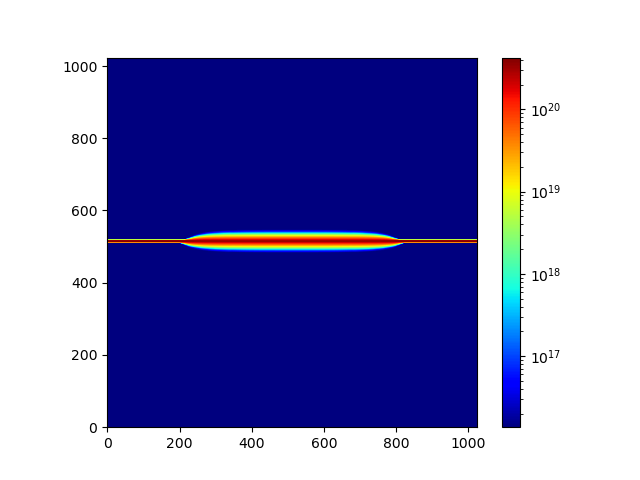

In [5]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

fig, ax = plt.subplots()

img_P = ax.imshow(
        np.flipud(np.rot90(density)),
        origin='lower',
        norm=LogNorm(),
        cmap='jet',
        aspect='equal'
    )
cbar_fields = plt.colorbar(
        img_P, 
        orientation="vertical",
        ticklocation="right",
    )

In [6]:
ts.write2openpmd(density,output_name="flash2openpmd")